### Importing the dataset

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras import backend as K
from sklearn.model_selection import KFold

### Preprocessing the Data

In [ ]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Shape of X train is: ",X_train.shape)
print("Shape of y train is ",y_train.shape)

Shape of X train is:  (60000, 28, 28)
Shape of y train is  (60000,)


In [ ]:
num_classes = 10

# reshaping dataset to have a single channel
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

#one hot encode target values
y_train = keras.utils.np_utils.to_categorical(y_train)
y_test = keras.utils.np_utils.to_categorical(y_test)

In [ ]:
#Preparing pixel for data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train/255.0
X_test = X_test/255.0

print("Shape of train set: ",X_train.shape)
print("Shape of test set: ",X_test.shape)

Shape of train set:  (60000, 28, 28, 1)
Shape of test set:  (10000, 28, 28, 1)


### Creating the model

In [13]:
batch_size = 32
num_classes = 10
epochs = 10

def create_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  
  ### Compiling CNN
  model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.9),metrics=['accuracy'])
  return model

### Train and evaluate the Model

In [14]:
def evaluation(dataX,dataY):
  scores = []
  history = []
  prev = 0
  kfold = KFold(5,shuffle=True, random_state=1)
  #enumarte the splits
  for ix_train, ix_test in kfold.split(dataX):
    #define the model
    model = create_model()
    trainX,trainY,testX,testY = dataX[ix_train],dataY[ix_train],dataX[ix_test],dataY[ix_test]
    #fit the model
    hist = model.fit(trainX,trainY, epochs = 10, batch_size= 32, validation_data=(testX,testY),verbose=0)
    _,acc = model.evaluate(testX,testY,verbose=0)
    if(acc > prev):
      model.save('mnist.h5')
      prev = acc
    print('> %.3f' % (acc*100.0))
    #store results
    scores.append(acc)
    history.append(hist)
  return scores,history

### Plotting learning curves

In [15]:
def plotting_learn(histories):
  for i in range(len(histories)):
    plt.subplot(2,1,1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'],color='blue', label='train')
    plt.plot(histories[i].history['val_loss'],color='orange', label='test')

    # plotting accuracy
    plt.subplot(2,1,2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'],color='blue',label='train')
    plt.plot(histories[i].history['val_accuracy'],color='orange',label='test')
  plt.show()

### To make the model and evaluate

> 99.025
> 98.975
> 99.075
> 99.125
> 99.042


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


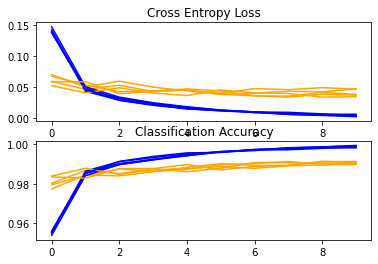

In [16]:
def run_test():
  scores,history = evaluation(X_train,y_train)
  plotting_learn(history)

run_test()

### Saving Final Model

In [31]:
def run_test_final():
  model = create_model()
  model.fit(X_train,y_train,epochs=10,batch_size=32,verbose=0)
  model.save('final_model.h5')

In [32]:
run_test_final()

In [33]:
model = tf.keras.models.load_model("DigitRecog/final_model.h5")
_, acc = model.evaluate(X_test,y_test, verbose=0)
print('> %.3f' % (acc * 100.0))

> 99.160


### Predicting a image

In [5]:
model = tf.keras.models.load_model("C:/Users/shrey/OneDrive - Nanyang Technological University/Desktop/MLAI projects/DigitRecog/final_model.h5")
img = load_img("C:/Users/shrey/OneDrive - Nanyang Technological University/Desktop/MLAI projects/DigitRecog/Digit/7.png",color_mode="grayscale",target_size=(28,28))
img = img_to_array(img)
img = img.reshape(1,28,28,1)
img = img.astype('float32')
img = img/255
predict = model.predict(img)
digit = np.argmax(predict)
print(digit)

7
